## ECE 143--Final Project--Group 14

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
dataset = pd.read_csv('./vehicles.csv')

In [3]:
# show details
dataset.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


#### There are car values with 0 prices, should be cleaned.
#### max odometer are 10^7 miles, should be removed
#### whole column of county is empty, should be removed.

In [4]:
# visulize first 5 rows of the data
dataset.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


#### There are columns such as "id", "url", "image_url", which are clearly nothing to do with car prices, should be removed.

In [5]:
# show summary of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
id              423857 non-null int64
url             423857 non-null object
region          423857 non-null object
region_url      423857 non-null object
price           423857 non-null int64
year            328743 non-null float64
manufacturer    313242 non-null object
model           325384 non-null object
condition       176719 non-null object
cylinders       197679 non-null object
fuel            327214 non-null object
odometer        270585 non-null float64
title_status    327759 non-null object
transmission    328065 non-null object
vin             184420 non-null object
drive           231119 non-null object
size            102627 non-null object
type            241157 non-null object
paint_color     222203 non-null object
image_url       329661 non-null object
description     329654 non-null object
county          0 non-null float64
state           423857 non-null obj

#### The counts of some columns are not equal to count of index number, which means there are missing values among those features.  

# Cleaning data


### 1. remove outliers

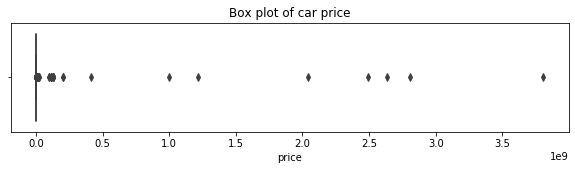

In [6]:
# visualize car prices distribution
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of car price')
sns.boxplot(x='price', data = dataset)

#### There are some car prices that are so large that needs to be removed.

In [7]:
# remove outilers using interquartile range in terms of price colunm
init_size = dataset.count()['id']
q1 = dataset['price'].quantile(0.25)
q3 = dataset['price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
dataset = dataset.loc[(dataset['price'] > fence_low) & (dataset['price'] < fence_high)]
filtered_size = dataset.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

19038 ( 4.49 % ) outliers removed from dataset


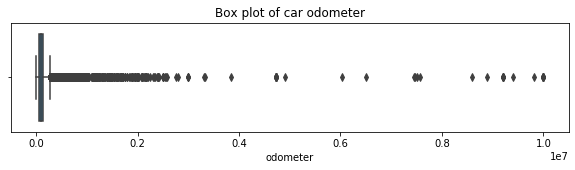

In [8]:
## For odometer we do the similiar things
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title('Box plot of car odometer')
sns.boxplot(x='odometer', data = dataset)

#### Odometer near or equal to zero is fine since the car could be very new, but some odometry like 10*7 miles is not possible, so we need to remove outpilers as well. This time we set a higher boundary to accept more samples.

In [9]:
# remove outilers using interquartile range in terms of price colunm
init_size = dataset.count()['id']
q1 = dataset['odometer'].quantile(0.25)
q3 = dataset['odometer'].quantile(0.75)
iqr = q3 - q1
dataset = dataset.loc[(dataset['odometer'] <= q3 + 3 *iqr)]
filtered_size = dataset.count()['id']
print(init_size-filtered_size,'(', '{:.2f}'.format(100*(init_size-filtered_size)/init_size), '%',')', 'outliers removed from dataset')

148365 ( 36.65 % ) outliers removed from dataset


### 2. drop uncorrelated columns

#### We only keep columns that have impact on car prices. 
#### There are some columns that are obviously unrelated with car price such as id, url, title_status, image_url, vin(vehicle identity number), description, region_url, region and county(since it is a null column). Since model car models can represent their manufacturers, so we can drop manufacturer as well.

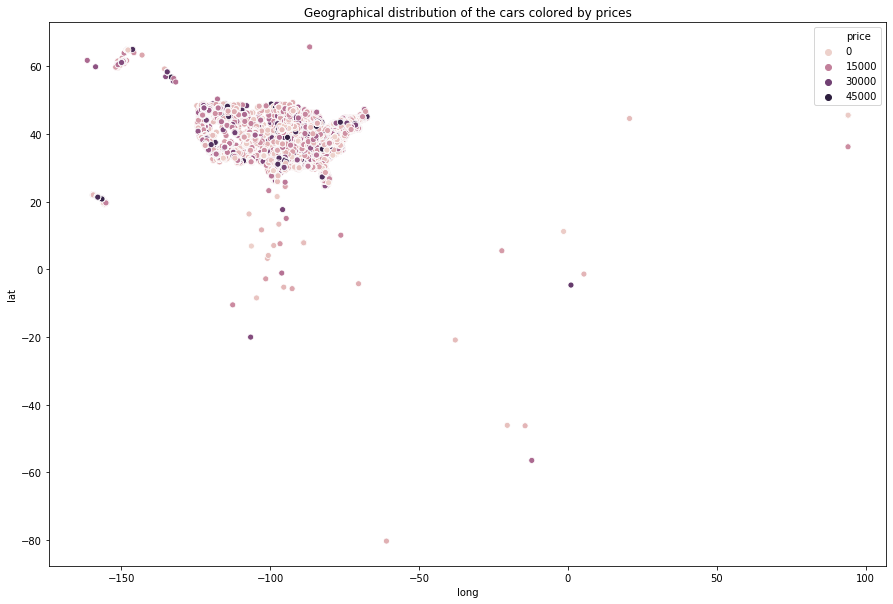

In [10]:
## determine how geographical coordinate affect car price
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Geographical distribution of the cars colored by prices')
sns.scatterplot(x= 'long', y='lat', data = dataset, hue = 'price', ax=ax )

#### We can see that the used car geographical distribution is concentrate on the U.S. However, the distribution of car prices are very random, no direct relationship between price and latitude or longtitude. Thus, we could drop these columns.

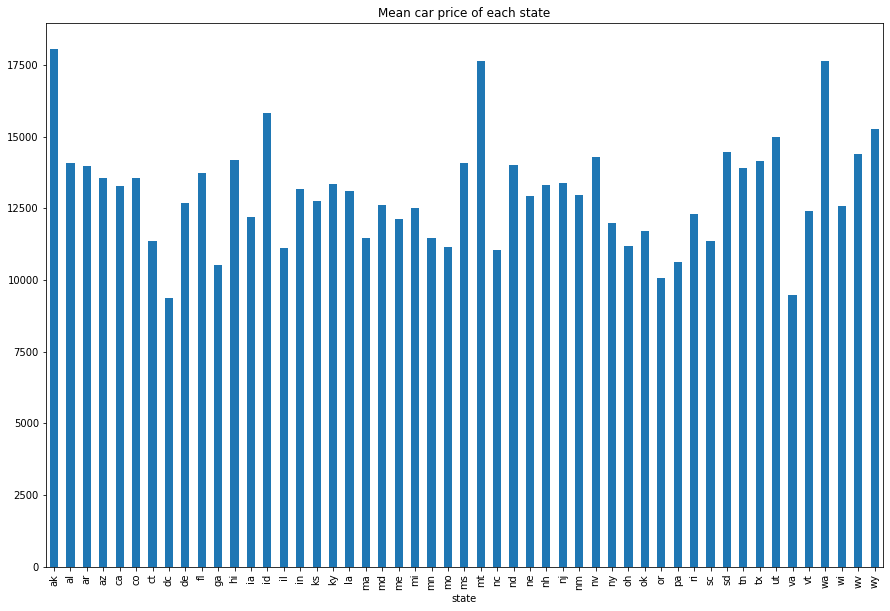

In [11]:
## determine how states affect car price
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Mean car price of each state')
dataset.groupby(['state']).mean()['price'].plot.bar(ax=ax)

#### We can see that state can affect car price to some extent, so we choose to keep this feature

In [12]:
# drop unnecessry columns
dataset = dataset.drop(columns = ['id', 'manufacturer', 'url', 'region', 'region_url', 'title_status', 'vin', 'image_url', 'description', 'county',  'long', 'lat'])

## 3. remove other impossible samples

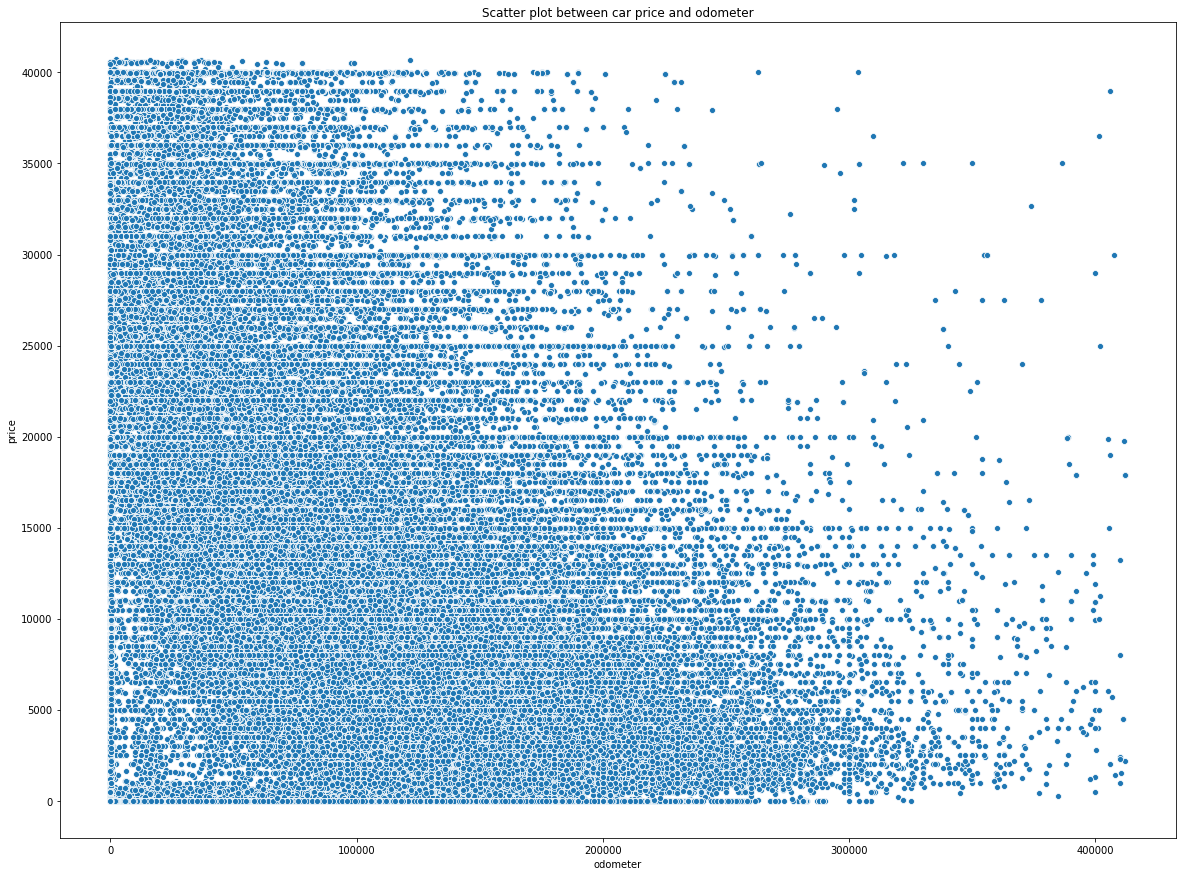

In [13]:
# visualize relationship between prices and odometer.
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Scatter plot between car price and odometer')
sns.scatterplot(x='odometer', y='price', data=dataset)

In [14]:
# set a minimum threshold 1000 miles to make the car price reasonable
dataset = dataset[dataset['price']>1000]
# since the minimum car made year is 1900, car less than 1980 can cause too much uncertainty
dataset = dataset[dataset['year']>1980]
# # The cheapest new car is around 2000$, but here there are some with 1000$ around
# # so we set a boundary to the sum of price and odometer
dataset = dataset[(dataset['price']+dataset['odometer'])>2000]

## 3. Deal with missing samples.

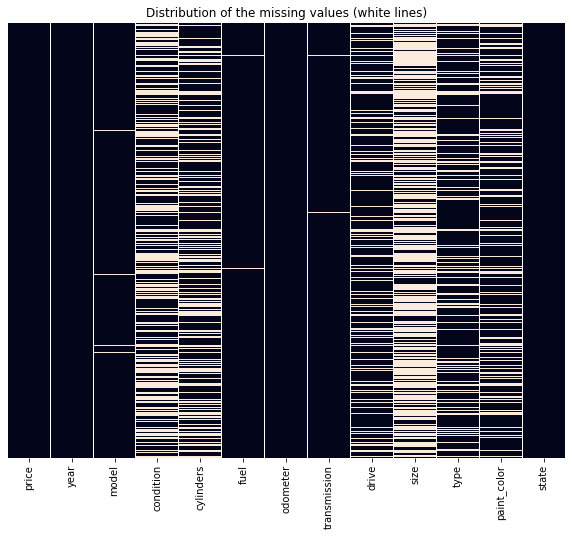

In [15]:
# visualize how missing values are distributed in each remained columns.
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Distribution of the missing values (white lines)')
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

#### We can see that 'size' has too many missing values, so we drop it.
#### For those columns that have very few missing values, we delete those rows.
#### Columns that have not too many and not too few missing values, we replace them with str 'null'.

In [16]:
# drop size column
dataset = dataset.drop(columns = ['size'])
# delete the rows for those columns that have very few null values
the_columns = ['price', 'year', 'model', 'fuel', 'transmission', 'odometer', 'drive', 'type', 'paint_color', 'state']
for i in the_columns:
    dataset = dataset[dataset[i].notnull()]
# replace missing values with str 'null'.
dataset = dataset.replace(np.nan, 'null', regex=True)


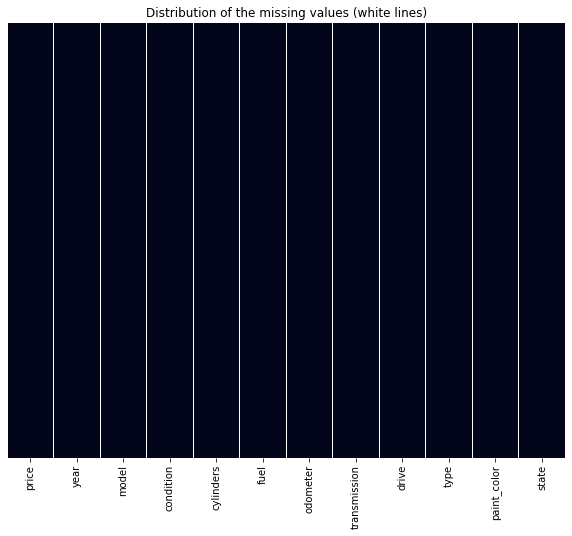

In [17]:
# visualize whether there are missing values
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Distribution of the missing values (white lines)')
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

## 4. remove model with little samples

#### To get better results, we remove those rows with model number less than 10.

In [18]:
dataset['model'].value_counts()

f-150                        2565
silverado 1500               1688
escape                       1568
camry                        1334
altima                       1183
                             ... 
mx6                             1
porsche cayman s                1
patriot fwd                     1
Volkswagon New Beetle           1
avalon xle premium hybrid       1
Name: model, Length: 13216, dtype: int64

In [19]:
dataset = dataset.groupby('model').filter(lambda x: len(x) > 10) 

In [20]:
dataset['model'].value_counts()

f-150             2565
silverado 1500    1688
escape            1568
camry             1334
altima            1183
                  ... 
passat s            11
terrain denali      11
mustang coupe       11
ridgeline rtl       11
durango crew        11
Name: model, Length: 1520, dtype: int64

## 5. Remove duplicate rows
#### This could aviod overfitting and save computational time

In [21]:
dataset = dataset.drop_duplicates()

## Visualize and store dataset after data cleaning 


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83003 entries, 5 to 423853
Data columns (total 12 columns):
price           83003 non-null int64
year            83003 non-null float64
model           83003 non-null object
condition       83003 non-null object
cylinders       83003 non-null object
fuel            83003 non-null object
odometer        83003 non-null float64
transmission    83003 non-null object
drive           83003 non-null object
type            83003 non-null object
paint_color     83003 non-null object
state           83003 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 8.2+ MB


In [23]:
# store cleaned data
dataset.to_csv(r'./cleaned_df.csv', index = False)